In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/bike-sharing.csv')

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
X=data.iloc[:,[7,15]].values
X

array([[ 6, 16],
       [ 6, 40],
       [ 6, 32],
       ...,
       [ 1, 90],
       [ 1, 61],
       [ 1, 49]])

In [ ]:
wcss=[]
for i in range(1,14):
      kmeans=KMeans(n_clusters=i,init='k-means++',random_state=60)
      kmeans.fit(X)

      wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'registered')

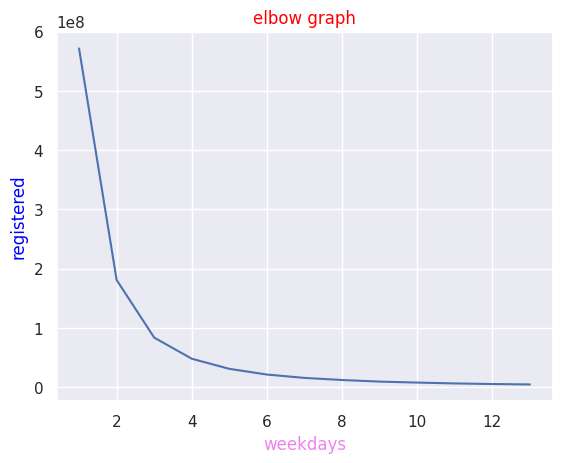

In [ ]:
sns.set()
plt.plot(range(1,14),wcss)
plt.title('elbow graph',c='red')
plt.xlabel('weekdays',c='violet')
plt.ylabel('registered',c='blue')


In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
Y=kmeans.fit_predict(X)
Y



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

<ipython-input-30-b12e72fda292>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],cmap='viridis',label='centeroids')


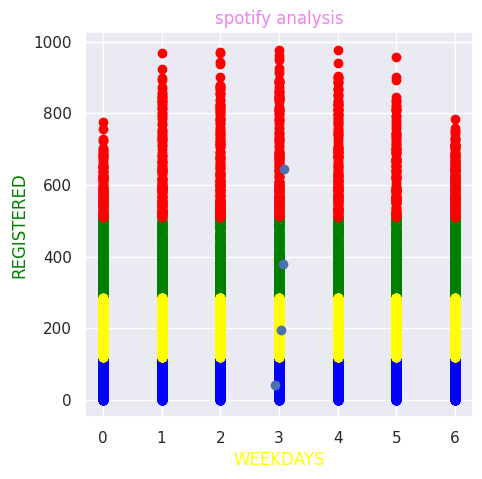

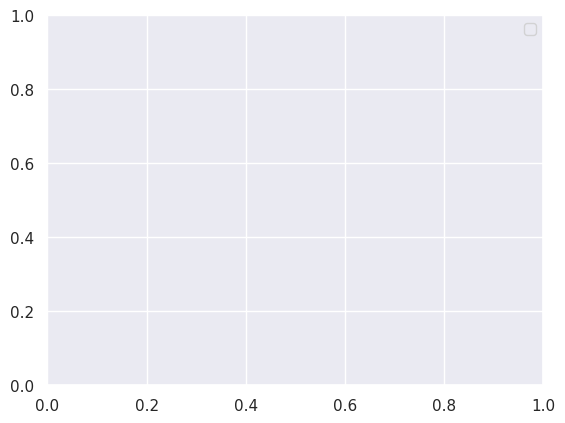

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0],X[Y==0,1],c='blue',label='cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1],c='green',label='cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1],c='red',label='cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1],c='yellow',label='cluster4')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],cmap='viridis',label='centeroids')
plt.title('spotify analysis',c='violet')
plt.xlabel('WEEKDAYS',c='yellow')
plt.ylabel('REGISTERED',c='green')
plt.show()
plt.legend()

